##Part 1: Parsing the dataset
*For this assignment, we use the Review polarity v2.0 data set created by Bo Pang and Lillian Lee at Cornell University. It consists of 2000 movie reviews, 1000 of which are positive and 1000 are negative.*

I'm parsing the data with the help of regular expressions. I'm getting rid of special characters and punctuation. 


In [3]:
!wget -N http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

--2021-06-10 19:12:20--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘review_polarity.tar.gz’ not modified on server. Omitting download.

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/c

In [4]:
import os
import numpy as np
import re
from timeit import default_timer as timer

In [5]:
#Loading data

X_raw = [] #strings
y = [] #labels

#positives
cwd = '/content/txt_sentoken/pos/'
files = os.listdir(cwd)
for file in files:
    with open(cwd+file, 'r') as f:
        print(f'loading postive review: {file}')
        text = f.read()
        text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
            
        X_raw.append(text)
        y.append(1)
        
        
#negatives
cwd = '/content/txt_sentoken/neg/'
files = os.listdir(cwd)
for file in files:
    with open(cwd+file, 'r') as f:
        print(f'loading negative review: {file}')
        text = f.read()
        text = re.sub(r'[^A-Za-z0-9]+', ' ', text)       
            
        X_raw.append(text)
        y.append(-1)

        


loading postive review: cv343_10368.txt
loading postive review: cv425_8250.txt
loading postive review: cv794_15868.txt
loading postive review: cv053_21822.txt
loading postive review: cv109_21172.txt
loading postive review: cv206_14293.txt
loading postive review: cv036_16831.txt
loading postive review: cv858_18819.txt
loading postive review: cv057_7453.txt
loading postive review: cv828_19831.txt
loading postive review: cv946_18658.txt
loading postive review: cv001_18431.txt
loading postive review: cv374_25436.txt
loading postive review: cv355_16413.txt
loading postive review: cv830_6014.txt
loading postive review: cv644_17154.txt
loading postive review: cv572_18657.txt
loading postive review: cv350_20670.txt
loading postive review: cv615_14182.txt
loading postive review: cv161_11425.txt
loading postive review: cv807_21740.txt
loading postive review: cv446_11353.txt
loading postive review: cv544_5108.txt
loading postive review: cv232_14991.txt
loading postive review: cv385_29741.txt
load

##Part 2: Feature extraction
*As basic features, we use a binary bag-of-words (BOW) representation of the words in each review. Each review in the data set is described by a vector with one element corresponding to each word in the vocabulary. An element is set to 1 if the review contains its associated word, otherwise it is set to 0.*

In [6]:
vocabulary = set()   
for sentence in X_raw:   #tokenization
    for word in sentence.split(" "):
        vocabulary.add(word)


X = np.zeros((len(X_raw), len(vocabulary)), dtype=int)

ordered_vocabulary = sorted(list(vocabulary))

for index, sentence in enumerate(X_raw):
    print(f'Processing review {index+1}. ')
    for word in sentence.split(" "):
        X[index][ordered_vocabulary.index(word)] = 1  

Processing review 1. 
Processing review 2. 
Processing review 3. 
Processing review 4. 
Processing review 5. 
Processing review 6. 
Processing review 7. 
Processing review 8. 
Processing review 9. 
Processing review 10. 
Processing review 11. 
Processing review 12. 
Processing review 13. 
Processing review 14. 
Processing review 15. 
Processing review 16. 
Processing review 17. 
Processing review 18. 
Processing review 19. 
Processing review 20. 
Processing review 21. 
Processing review 22. 
Processing review 23. 
Processing review 24. 
Processing review 25. 
Processing review 26. 
Processing review 27. 
Processing review 28. 
Processing review 29. 
Processing review 30. 
Processing review 31. 
Processing review 32. 
Processing review 33. 
Processing review 34. 
Processing review 35. 
Processing review 36. 
Processing review 37. 
Processing review 38. 
Processing review 39. 
Processing review 40. 
Processing review 41. 
Processing review 42. 
Processing review 43. 
Processing review 44

In [6]:
lut = dict()
for i, word in enumerate(ordered_vocabulary):
  lut[word] = i

for word in ['dolphin', 'the', 'coffee', 'gggggdlgg']:
  if word in vocabulary:
    print("'%s' is represented as feature dimension %i" %(word, lut[word]))
  else:
    print("'%s' is not in the vocabulary" % word)

'dolphin' is represented as feature dimension 10180
'the' is represented as feature dimension 35023
'coffee' is represented as feature dimension 6624
'gggggdlgg' is not in the vocabulary


In [7]:
print(ordered_vocabulary[2000:2010])
print(X[:10, 2000:2010])
for w in ['dolphin', 'the', 'coffee']:
  print("'%s' in words: %s" % (w, w in vocabulary))

['ardour', 'arduous', 'are', 'area', 'areas', 'arecibo', 'aren', 'arena', 'arenas', 'arent']
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
'dolphin' in words: True
'the' in words: True
'coffee' in words: True


In [8]:
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)  #adding pseudo input; bias

##Part 3: Learning framework

In [9]:
# Splitting the data X and y into training and testing sets with the testing size; 80:20.

y = np.asarray(y)  #changing labels from a list to array

X_train = np.concatenate((X[:800], X[1200:])) 
X_test = X[800:1200]
y_train = np.concatenate((y[:800], y[1200:])) 
y_test = y[800:1200]


assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [10]:
assert len(X_raw) == 2000
assert np.all([isinstance(x, str) for x in X_raw])
assert len(X_raw) == y.shape[0]
assert len(np.unique(y))==2
assert y.min() == -1
assert y.max() == 1

In [15]:
class LinearRegressionwithGD:  
  """Linear Regression with Gradient Descent.

    Parameters:
    ----------
    learning_rate : float
    reguliser_dampening : float
    """
  def __init__(self, learning_rate, reguliser_dampening):
    self.learning_rate = learning_rate
    self.reguliser_dampening = reguliser_dampening
    self.omega = np.zeros(X.shape[1])                                           #initializing omega

  def objective_function(self, omega, X, y):
    '''Hinge loss with L2 regularization
    Parameters:
    ----------
    X : array-like, shape = [samples, features]
        training samples
    y : array-like, shape = [target_labels,]
        target labels
    omega: array-like,
          theta
    '''
    from numpy import linalg                                                    #importing euclidean distance
    
    l2_regularization = self.reguliser_dampening/2 * ((linalg.norm(omega)) **2) #calculating l2 regularization
    total_loss = 0                                                              #container for all losses
    for sent in range(len(X)):
      label_y = y[sent]
      instance_loss = (0, 1 - (label_y * np.dot(omega.T, X[sent])))  
      total_loss += max(instance_loss)
    return (l2_regularization + total_loss) 

  def gradient(self, omega, X, y): 
    '''Gradient for gradient descent
    Parameters:
    ----------
    X : array-like, shape = [samples, features]
        training samples
    y : array-like, shape = [target_labels]
        target labels
    omega: array,
          theta
    '''
    w = np.copy(omega * self.reguliser_dampening)                               #initalizing the weight matrix
    for sent in range(len(X)):
      label_y = y[sent]                                                         #the correct label
      if not (label_y * (np.dot (omega.T, X[sent]))) >=1:
        w -= label_y * X[sent]
      else:
        w += 0
    return w
  
  def fit(self, X, y):
    '''Fitting the training data.
    Parameters:
    ----------
    X : array-like, shape = [samples, features]
        training samples.
    y : array-like, shape = [target_labels]
        target labels.
    '''
    stop_criterion = 0.01                                                       #one of the criteria to stop the function
    omega = self.omega                                                          #initializing omega from init
    time = 0
    max_number_of_iterations = 200                                              #max number of passes over the training set

    for iteration_counter in range(1, max_number_of_iterations+1):
      start = timer() 
      new_omega = omega - self.learning_rate * self.gradient(omega, X, y)
      loss = round(self.objective_function(new_omega, X, y), 3)
      abs_value = round(np.sum(abs(new_omega - omega)), 3)                       #the sum of the absolute differences between the new and old omegas, needed for stop_criterion
      end = timer()
      time = (end-start)

      if abs_value  < stop_criterion or iteration_counter == max_number_of_iterations:  #stopping criteria
        self.omega = new_omega                                                  #updating the omega from init -> the best omega
        print("-- Epoch number: %d "%(iteration_counter),"\n",
            "Loss: %.4f, Absolute value: %.4f." %(loss, abs_value))
        print(f"Convergence after %d number of iterations took %.2f seconds."%(iteration_counter,time))
        break

      if iteration_counter == 1 or iteration_counter % 50 == 0:                 #printing the information for the user 
          print("-- Epoch number: %d "%(iteration_counter),"\n",
                "Loss: %.4f, Absolute value: %.4f." %(loss, abs_value), "\n",
                "Total training time: %.2f seconds." %(time))
      
      omega = new_omega
      

  @property  
  def get_omega(self):  
    """ Returning the best omega. Without fitting the model, it returns the initialized omega.
    After fitting the model, it returns the best omega we got.
    We need it to plot the weights"""                                                       
    return self.omega
  
  def predict(self, X):
    """ Predicting the value after fitting the model.
        Parameters
        ----------
        x : array-like, shape = [samples, features]
            Test dataset"""
    y_predictions = []
    for sent in range(len(X)):
      y_hat = np.sign(np.dot(self.omega.T, X[sent]))                            #calculating hyperplane
      y_predictions.append(y_hat)
    return y_predictions
  
  def score(self, X, y):
    """Returning accuracy score for the model.
    Parameters:
    ----------
    X : array-like, shape = [samples, features]
        training samples.
    y : array-like, shape = [target_labels]
        target labels.""" 
    score = np.sum(model.predict(X)==y)/len(y)
    return score*100


##Part 4: Exploring hyperparameters
Implementing a grid search with nested for-loops to find the best hyperparameters for the model. Results are appended to a dictionary, then printed as a sorted pandas dataframe. 

!!! Before running the kernel, take into consideration that the code will run for at least 50 minutes, since I am testing 10 hyperparameters in 2 nested loops (5*5).

In [18]:
import pandas as pd

In [19]:
# parameters 
#lr_parameters = [round(np.random.choice(np.exp(np.linspace(np.log(0.0001), np.log(3), 10))), 5) for _ in range(5)]
lr_parameters = [0.0001, 0.001, 0.01, 0.1, 1.0]
rd_parameters= [0.0001, 0.001, 0.01, 0.1, 1.0] 

# placeholder for dataframe
results = [] 

# testing the best parameters 
for learning_rate in lr_parameters:
  for reguliser_dampening in rd_parameters:

    # Classifier
    model = LinearRegressionwithGD(learning_rate=learning_rate,
                                               reguliser_dampening=reguliser_dampening)

    # Training the classifier
    print(f'Training with hyperparameters: learning rate [{ learning_rate}], reguliser dampening [{reguliser_dampening}]')
    print('==========================================')
    model.fit(X_train, y_train)
    print('\n')

    # Calculating the accuracy
    accuracy = model.score(X_test, y_test)

    # Appending results to the dataframe
    results.append({
            'Learning rate:': learning_rate,
            'Reg.dampening:': reguliser_dampening,
            'Training set accuracy:': accuracy
              })

Training with hyperparameters: learning rate [0.0001], reguliser dampening [0.0001]
-- Epoch number: 1  
 Loss: 1453.2740, Absolute value: 9.8460. 
 Total training time: 0.43 seconds.
-- Epoch number: 50  
 Loss: 968.4450, Absolute value: 19.2260. 
 Total training time: 0.31 seconds.
-- Epoch number: 100  
 Loss: 95.8640, Absolute value: 1.5910. 
 Total training time: 0.27 seconds.
-- Epoch number: 150  
 Loss: 141.3080, Absolute value: 10.5630. 
 Total training time: 0.27 seconds.
-- Epoch number: 200  
 Loss: 2.5260, Absolute value: 0.1200.
Convergence after 200 number of iterations took 0.26 seconds.


Training with hyperparameters: learning rate [0.0001], reguliser dampening [0.001]
-- Epoch number: 1  
 Loss: 1453.2740, Absolute value: 9.8460. 
 Total training time: 0.39 seconds.
-- Epoch number: 50  
 Loss: 968.4500, Absolute value: 19.2260. 
 Total training time: 0.29 seconds.
-- Epoch number: 100  
 Loss: 95.8700, Absolute value: 1.5910. 
 Total training time: 0.27 seconds.
-- 

In [20]:
#creating a pandas dataframe and sorting values by accuracy      
import pandas as pd
results = pd.DataFrame(results)
results = results.sort_values(by='Training set accuracy:', ascending=False)     #sorting by accuracy
print(results)

    Learning rate:  Reg.dampening:  Training set accuracy:
0           0.0001          0.0001                   87.50
1           0.0001          0.0010                   87.50
2           0.0001          0.0100                   87.25
4           0.0001          1.0000                   87.25
3           0.0001          0.1000                   87.00
18          0.1000          0.1000                   86.50
5           0.0010          0.0001                   86.25
6           0.0010          0.0010                   86.25
7           0.0010          0.0100                   86.25
8           0.0010          0.1000                   86.25
9           0.0010          1.0000                   86.25
22          1.0000          0.0100                   86.25
16          0.1000          0.0010                   86.00
21          1.0000          0.0010                   86.00
20          1.0000          0.0001                   86.00
17          0.1000          0.0100                   86.

In [21]:
#storing the best hyperparameters
best_learning_rate = results.iloc[0]['Learning rate:']
best_reguliser_dampening = results.iloc[0]['Reg.dampening:']
print(f'Best parameters are: {best_learning_rate}, {best_reguliser_dampening}')

Best parameters are: 0.0001, 0.0001


## Final model

In [22]:
# Set up the classifier
model = LinearRegressionwithGD(learning_rate=best_learning_rate,
                                    reguliser_dampening=best_reguliser_dampening)

# Train on all the non-test data
model.fit(X_train, y_train)

# Run prediction on the test set & get score
test_accuracy = model.score(X_test, y_test)

print("Test set accuracy %.1f%%." % (test_accuracy))

#Get the parameter vector
omega = model.get_omega

-- Epoch number: 1  
 Loss: 1453.2740, Absolute value: 9.8460. 
 Total training time: 0.40 seconds.
-- Epoch number: 50  
 Loss: 968.4450, Absolute value: 19.2260. 
 Total training time: 0.30 seconds.
-- Epoch number: 100  
 Loss: 95.8640, Absolute value: 1.5910. 
 Total training time: 0.27 seconds.
-- Epoch number: 150  
 Loss: 141.3080, Absolute value: 10.5630. 
 Total training time: 0.29 seconds.
-- Epoch number: 200  
 Loss: 2.5260, Absolute value: 0.1200.
Convergence after 200 number of iterations took 0.27 seconds.
Test set accuracy 87.5%.


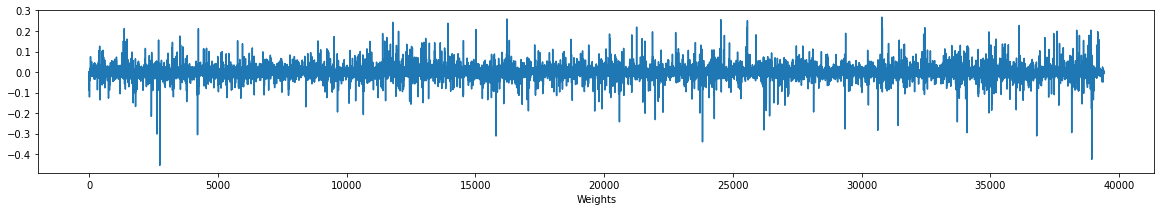

In [23]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20, 3))
plt.plot(model.omega[1:])
plt.xlabel("Value")
plt.xlabel("Weights")
plt.show()

In [24]:
assert (len(model.omega)-1) == len(vocabulary)

# Sort by absolute value
idx = np.argsort(np.abs(model.omega[1:]))

print("                Word   Weight  Occurences")
for i in idx[-20:]:   # Pick those with highest 'voting' values
  print("%20s   %.3f\t%i " % (ordered_vocabulary[i], model.omega[i+1], np.sum([ordered_vocabulary[i] in d for d in X_raw])))

                Word   Weight  Occurences
               looks   -0.242	364 
              stupid   -0.242	227 
          especially   0.242	374 
        performances   0.250	370 
              others   0.255	378 
           hilarious   0.258	191 
              should   -0.261	708 
                 see   0.268	1662 
          ridiculous   -0.277	159 
                plot   -0.282	1002 
              script   -0.284	632 
               waste   -0.295	246 
            supposed   -0.295	321 
               awful   -0.302	156 
              boring   -0.305	229 
       unfortunately   -0.311	329 
                have   -0.311	1658 
             nothing   -0.340	594 
               worst   -0.425	238 
                 bad   -0.454	825 


##Description of the model



To preprocess data, I decided to use regular expressions. I created two lists: `X_raw` and `y`. After parsing, reviews were appended to `X_raw`. If a review was positive, it was labeled as `1`, if it was negative, `-1` was appended to `y`.

After preprocessing, I tokenized reviews and created a binary bag-of-word representation. I also added pseudo input (bias).

I implemented *Linear Regression with Gradient Descent*. First, I the initialized omega by creating the array of zeros (size of `X.shape[1]`). Methods like objective function and gradient are help methods for the fit method. In my fit method I decided to implement two stop criteria:
1.   Max number of iterations;
2.   The sum of the absolute differences between the new and old omegas.

If one of the criteria is reached, the function breaks and sets the latest omega to self.omega in our init method. I need this updated omega for predict/score methods.
The predict method is using a hyperplane formula to calculate `y hat`. The score method calculates the accuracy. 

To tune hyperparameters (`learning rate` & `reguliser dampening`), I decided to create a grid search function, which loops through the possible hyperparameters, to find the ones with the best accuracy. Instead of taking random values, I specified the lists of hyperparameters’ values. Thanks to that, I was able to have more control over my grid search. According to my function, the best hyperparameters were: *learning rate = 0.0001* & *reguliser dampening=0.0001*. With these hyperparameters, the model scored an accuracy of 87.50%.

By plotting the words with the strongest influence, we can notice that the highest impact has words, which can be counted as negative (stupid, ridiculous, awful, boring, etc.) and their weight is negative. Since I did not filter out stop words, one of the words with the highest occurrence is ‘have’.
